In [1]:
from pylab import *
import matplotlib.pyplot as plt
import os
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

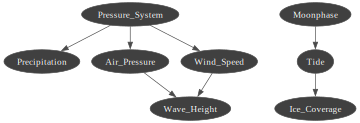

In [9]:
# Initialize an empty Bayesian Network
bn = gum.BayesNet('Weather_Marine_BN')

# Add nodes (variables) with explicit labels
bn.add(gum.LabelizedVariable('Pressure_System', 'High or Low Pressure System', ['High', 'Low']))
bn.add(gum.LabelizedVariable('Air_Pressure', 'Air Pressure', ['High', 'Medium', 'Low']))
bn.add(gum.LabelizedVariable('Wind_Speed', 'Wind Speed', ['Low', 'Medium', 'High']))
bn.add(gum.LabelizedVariable('Precipitation', 'Precipitation', ['No', 'Yes']))
bn.add(gum.LabelizedVariable('Wave_Height', 'Wave Height', ['Low', 'Medium', 'High']))
bn.add(gum.LabelizedVariable('Moonphase', 'Moonphase', ['Phase0', 'Phase1', 'Phase2', 'Phase3', 'Phase4', 'Phase5', 'Phase6', 'Phase7']))
bn.add(gum.LabelizedVariable('Tide', 'Tide', ['Low', 'Medium', 'High']))
bn.add(gum.LabelizedVariable('Air_Temperature', 'Air Temperature', ['Low', 'Medium', 'High']))
bn.add(gum.LabelizedVariable('Ice_Coverage', 'Ice Coverage', ['Low', 'Medium', 'High']))




In [11]:
# Pressure_System CPT
bn.cpt('Pressure_System').fillWith([0.6, 0.4])  # 60% High, 40% Low

# Air_Pressure CPT
bn.cpt('Air_Pressure')[
    :, 'High'] = [0.7, 0.2]  # Pressure_System=High
bn.cpt('Air_Pressure')[
    :, 'Medium'] = [0.2, 0.6]  # Pressure_System=Low
bn.cpt('Air_Pressure')[
    :, 'Low'] = [0.1, 0.2]  # Adjust as needed

# Wind_Speed CPT
bn.cpt('Wind_Speed')[
    :, 'Low'] = [0.8, 0.3]  # Pressure_System=High
bn.cpt('Wind_Speed')[
    :, 'Medium'] = [0.15, 0.4]
bn.cpt('Wind_Speed')[
    :, 'High'] = [0.05, 0.3]

# Precipitation CPT
bn.cpt('Precipitation')[
    :, 'No'] = [0.9, 0.4]  # Pressure_System=High
bn.cpt('Precipitation')[
    :, 'Yes'] = [0.1, 0.6]

# Wave_Height CPT
bn.cpt('Wave_Height')[
    'Wind_Speed=Low', :] = [0.9, 0.1, 0.0]  # Low, Medium, High
bn.cpt('Wave_Height')[
    'Wind_Speed=Medium', :] = [0.3, 0.6, 0.1]
bn.cpt('Wave_Height')[
    'Wind_Speed=High', :] = [0.0, 0.3, 0.7]

# Moonphase CPT
bn.cpt('Moonphase').fillWith([1/8] * 8)

# Tide CPT (simplified: only varying with Moonphase)
# Assuming Tide=Low, Medium, High based on Moonphase
# For simplicity, let's assume:
# - New Moon and Full Moon (phases 0 and 4): higher tides
# - Other phases: moderate tides

for phase in range(8):
    if phase in [0, 4]:  # New Moon and Full Moon
        bn.cpt('Tide')[f'Moonphase={phase}', :] = [0.2, 0.3, 0.5]  # More High Tide
    else:
        bn.cpt('Tide')[f'Moonphase={phase}', :] = [0.3, 0.5, 0.2]  # More Medium Tide

# Air_Temperature CPT
bn.cpt('Air_Temperature').fillWith([0.3, 0.5, 0.2])  # Low, Medium, High

# Ice_Coverage CPT (simplified example)
# Define for all combinations of Tide and Air_Temperature
for tide in ['Low', 'Medium', 'High']:
    for temp in ['Low', 'Medium', 'High']:
        if temp == 'Low':
            if tide == 'Low':
                bn.cpt('Ice_Coverage')[(f'Tide={tide}', f'Air_Temperature={temp}'), :] = [0.8, 0.15, 0.05]
            elif tide == 'Medium':
                bn.cpt('Ice_Coverage')[(f'Tide={tide}', f'Air_Temperature={temp}'), :] = [0.6, 0.3, 0.1]
            else:  # High
                bn.cpt('Ice_Coverage')[(f'Tide={tide}', f'Air_Temperature={temp}'), :] = [0.4, 0.4, 0.2]
        elif temp == 'Medium':
            if tide == 'Low':
                bn.cpt('Ice_Coverage')[(f'Tide={tide}', f'Air_Temperature={temp}'), :] = [0.5, 0.3, 0.2]
            elif tide == 'Medium':
                bn.cpt('Ice_Coverage')[(f'Tide={tide}', f'Air_Temperature={temp}'), :] = [0.3, 0.5, 0.2]
            else:  # High
                bn.cpt('Ice_Coverage')[(f'Tide={tide}', f'Air_Temperature={temp}'), :] = [0.1, 0.4, 0.5]
        else:  # High Temperature
            if tide == 'Low':
                bn.cpt('Ice_Coverage')[(f'Tide={tide}', f'Air_Temperature={temp}'), :] = [0.1, 0.3, 0.6]
            elif tide == 'Medium':
                bn.cpt('Ice_Coverage')[(f'Tide={tide}', f'Air_Temperature={temp}'), :] = [0.0, 0.2, 0.8]
            else:  # High
                bn.cpt('Ice_Coverage')[(f'Tide={tide}', f'Air_Temperature={temp}'), :] = [0.0, 0.1, 0.9]






OutOfBounds: [pyAgrum] Out of bound error: label 'High' is unknown in Air_Pressure:Labelized({0|1|2})